## SET 2 FOR DIABETES

### after  completion of EDA continues for set2 for model implementation

## Importing the librarys

In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
dataset=pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset=dataset[(dataset[['Glucose','BloodPressure','BMI','Insulin']]!=0).all(axis=1)]

In [8]:
dataset["SkinThickness"] = dataset.SkinThickness.fillna(dataset['SkinThickness'].mean())

In [9]:
dataset.loc[(dataset['Glucose']==0)|(dataset['BloodPressure']==0)|(dataset['SkinThickness']==0)|(dataset['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


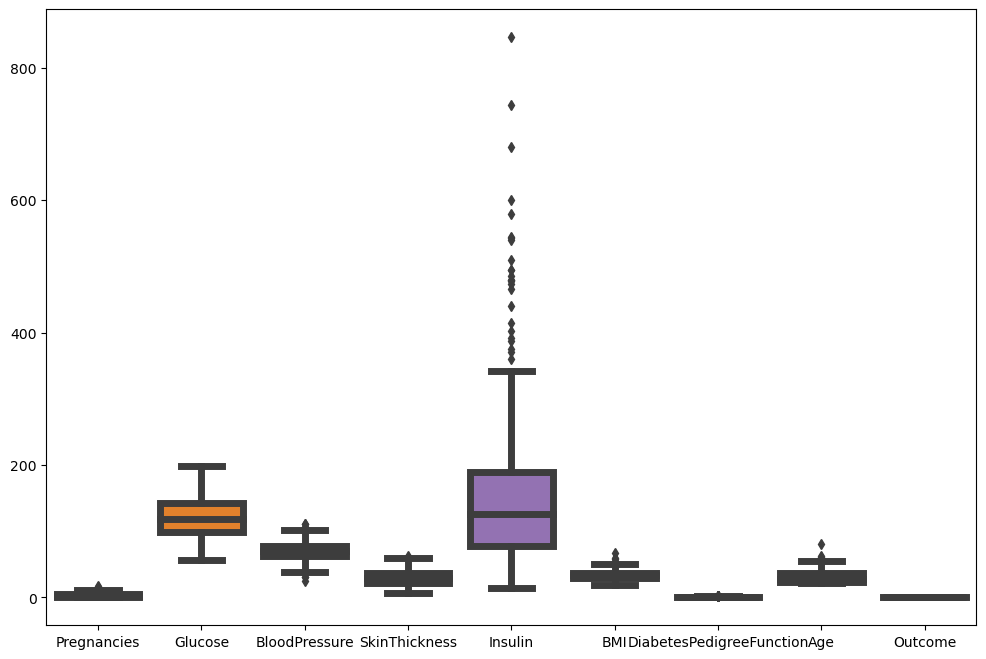

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=dataset,width=0.8,fliersize=5,linewidth=5,whis=1.5)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

In [12]:
q1 = dataset['Insulin'].quantile(0.25)                 
q3 = dataset['Insulin'].quantile(0.75)
iqr = q3 - q1


In [13]:
filter = (dataset['Insulin'] >= q1 - iqr*1.5) & (dataset['Insulin'] <= q3 + 1.5*iqr)
dataset.loc[filter] 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


<AxesSubplot:>

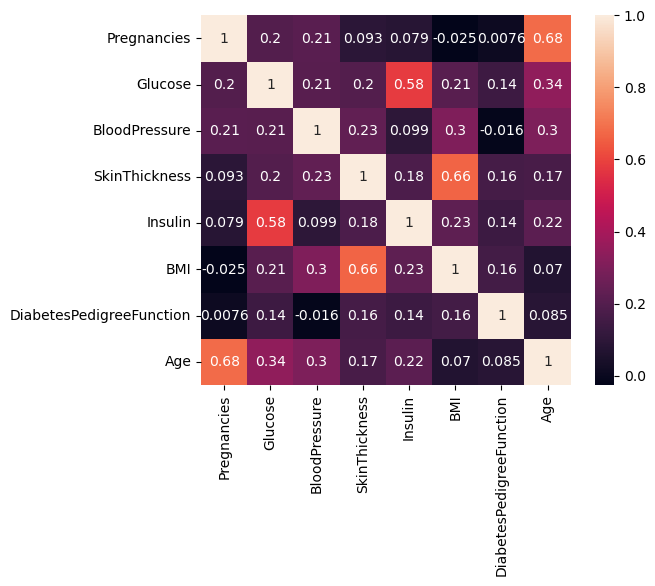

In [14]:
sns.heatmap(data=dataset[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].corr(), square=True , annot=True, cbar=True)

### after set 1 compleated set 2 starts

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [38]:
models=[]

In [39]:
models.append(["logistic regression",LogisticRegression(max_iter = 10000,random_state=0)])
models.append(["RandomForestClassifier_min",RandomForestClassifier(n_estimators=100,random_state=0)])
models.append(["RandomForestClassifier_max",RandomForestClassifier(n_estimators=100,random_state=0,min_samples_split=8)])
models.append([" DecisionTreeClassifier_gini", DecisionTreeClassifier()])
models.append([" DecisionTreeClassifier_entropy", DecisionTreeClassifier(criterion="entropy", max_depth=3)])
models.append(["  GradientBoostingClassifier",  GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)])


In [22]:
X= dataset[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = dataset['Outcome']

In [41]:
list1=[]
for i in range(len(models)):
    list2=[]
    model=models[i][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    con_matrix=confusion_matrix(y_test, y_pred)
    preci=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print(models[i][0])
    print(con_matrix)
    print(accuracy)
    print(preci)
    print(recall)
    print(f1)
    list2.append(models[i][0])
    list2.append(accuracy_score(y_test,y_pred))
    list2.append(confusion_matrix(y_test, y_pred))
    list2.append(precision_score(y_test,y_pred))
    list2.append(recall_score(y_test,y_pred))
    list2.append(f1_score(y_test,y_pred))
    list1.append(list2)

logistic regression
[[69  7]
 [20 22]]
0.7711864406779662
0.7586206896551724
0.5238095238095238
0.6197183098591549
RandomForestClassifier_min
[[65 11]
 [17 25]]
0.7627118644067796
0.6944444444444444
0.5952380952380952
0.6410256410256411
RandomForestClassifier_max
[[67  9]
 [17 25]]
0.7796610169491526
0.7352941176470589
0.5952380952380952
0.6578947368421053
 DecisionTreeClassifier_gini
[[66 10]
 [22 20]]
0.7288135593220338
0.6666666666666666
0.47619047619047616
0.5555555555555556
 DecisionTreeClassifier_entropy
[[65 11]
 [16 26]]
0.7711864406779662
0.7027027027027027
0.6190476190476191
0.6582278481012659
  GradientBoostingClassifier
[[67  9]
 [15 27]]
0.7966101694915254
0.75
0.6428571428571429
0.6923076923076924


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print (X_train.shape)
print (X_test.shape)

(313, 8)
(79, 8)


In [24]:
# Understand split of DV
print("Train:",y_train.value_counts(normalize = True))
print("Test:",y_test.value_counts(normalize = True))

Train: 0    0.664537
1    0.335463
Name: Outcome, dtype: float64
Test: 0    0.683544
1    0.316456
Name: Outcome, dtype: float64


In [25]:
#logistic Regression
logreg = LogisticRegression(max_iter = 10000,random_state=0)
logreg.fit(X_train, y_train)
log_predicted= logreg.predict(X_test)
print("IDVs:\n",X_train.columns)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)


IDVs:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Coefficient: 
 [[ 0.00546014  0.04026356 -0.00223946  0.02448755 -0.00126202  0.04781741
   0.81324084  0.04457406]]
Intercept: 
 [-9.73483546]


In [26]:
y_pred = logreg.predict(X_train)
print('Accuracy: \n', accuracy_score(y_train,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_train,y_pred))
print('Classification Report: \n', classification_report(y_train,y_pred))
#sns.heatmap(confusion_matrix(y_train,log_predicted_train),annot=True,fmt="d")


Accuracy: 
 0.792332268370607
Confusion Matrix: 
 [[185  23]
 [ 42  63]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       208
           1       0.73      0.60      0.66       105

    accuracy                           0.79       313
   macro avg       0.77      0.74      0.76       313
weighted avg       0.79      0.79      0.79       313



In [27]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#x, y = make_classification(n_samples=100, n_features=1)
clf11 = RandomForestClassifier(n_estimators=100,random_state=0)
print(clf11.fit(X_train, y_train))
y_pred = clf11.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



RandomForestClassifier(random_state=0)
0.7627118644067796
[[65 11]
 [17 25]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        76
           1       0.69      0.60      0.64        42

    accuracy                           0.76       118
   macro avg       0.74      0.73      0.73       118
weighted avg       0.76      0.76      0.76       118



In [28]:
#random farest
clf12 = RandomForestClassifier(n_estimators=100,random_state=0,min_samples_split=8)
clf12.fit(X_train, y_train)
y_pred= clf12.predict(X_test)
print(clf12.fit(X_train, y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


RandomForestClassifier(min_samples_split=8, random_state=0)
0.7796610169491526
[[67  9]
 [17 25]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        76
           1       0.74      0.60      0.66        42

    accuracy                           0.78       118
   macro avg       0.77      0.74      0.75       118
weighted avg       0.78      0.78      0.77       118



In [29]:
#Decision Trees
#gini
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#print(y_pred)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7627118644067796
[[68  8]
 [20 22]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        76
           1       0.73      0.52      0.61        42

    accuracy                           0.76       118
   macro avg       0.75      0.71      0.72       118
weighted avg       0.76      0.76      0.75       118



In [34]:
#Entropy
clf3= DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf3= clf3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7711864406779662
[[65 11]
 [16 26]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        76
           1       0.70      0.62      0.66        42

    accuracy                           0.77       118
   macro avg       0.75      0.74      0.74       118
weighted avg       0.77      0.77      0.77       118



In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.7966101694915254
[[67  9]
 [15 27]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        76
           1       0.75      0.64      0.69        42

    accuracy                           0.80       118
   macro avg       0.78      0.76      0.77       118
weighted avg       0.79      0.80      0.79       118



## 1.Pls calculate the performance metrics (precision, recall, f1-score, sensitivity, specificity, etc.)and interpret them in simple plain English. You have looked at several tree-based methodsin the past 2 weeks. Tabulate the metrics for each (in a excel sheet). Compare and contrast

In [40]:
models

[['logistic regression', LogisticRegression(max_iter=10000, random_state=0)],
 ['RandomForestClassifier_min', RandomForestClassifier(random_state=0)],
 ['RandomForestClassifier_max',
  RandomForestClassifier(min_samples_split=8, random_state=0)],
 [' DecisionTreeClassifier_gini', DecisionTreeClassifier()],
 [' DecisionTreeClassifier_entropy',
  DecisionTreeClassifier(criterion='entropy', max_depth=3)],
 ['  GradientBoostingClassifier',
  GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                             n_estimators=20, random_state=0)]]

In [42]:
dataframe=pd.DataFrame(list1,columns=['model','accuracy','confusion_matrix','(precision_score','recall_score','f1_score'])
dataframe.sort_values(by=['accuracy'],ascending=True)

,model,accuracy,confusion_matrix,(precision_score,recall_score,f1_score
3,DecisionTreeClassifier_gini,0.728814,"[[66, 10], [22, 20]]",0.666667,0.476190,0.555556
1,RandomForestClassifier_min,0.762712,"[[65, 11], [17, 25]]",0.694444,0.595238,0.641026
0,logistic regression,0.771186,"[[69, 7], [20, 22]]",0.758621,0.523810,0.619718
4,DecisionTreeClassifier_entropy,0.771186,"[[65, 11], [16, 26]]",0.702703,0.619048,0.658228
2,RandomForestClassifier_max,0.779661,"[[67, 9], [17, 25]]",0.735294,0.595238,0.657895
5,GradientBoostingClassifier,0.796610,"[[67, 9], [15, 27]]",0.750000,0.642857,0.692308


### this file is stored in excel file

In [43]:
dataframe.to_csv("ML_algorithms.csv")

##  2. Ultimately, this is a binary classification problem. Can you run a logistic regression on thesame data set and see if this outperforms the tree-based methods?

### Yes,above code is logistic regressions 

### 3. Can you include the “outcome” as an independent categorical variable and predict the

### No, because outcome is dependent variable we have to predict that value that is depencs on some other features, (may be overfitting occures)

## 4. continuous blood pressure variable using simple linear regression?


### Yes, if we want find the blood pressure of some new data then we can use ,but for finding the dieabetic or not  is not possible

## 5. Use all the tree-based methods you learnt for the above linear regression problem and check if the accuracy improves

### the accuracy is not much difference very litile bit 

## feature_score 

In [44]:
feature_scores = pd.Series(clf12.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

Glucose                     0.280718
Insulin                     0.147251
Age                         0.127252
DiabetesPedigreeFunction    0.120914
BMI                         0.118155
SkinThickness               0.076724
Pregnancies                 0.065006
BloodPressure               0.063980
dtype: float64


Text(0.5, 1.0, 'Visualizing Important Features')

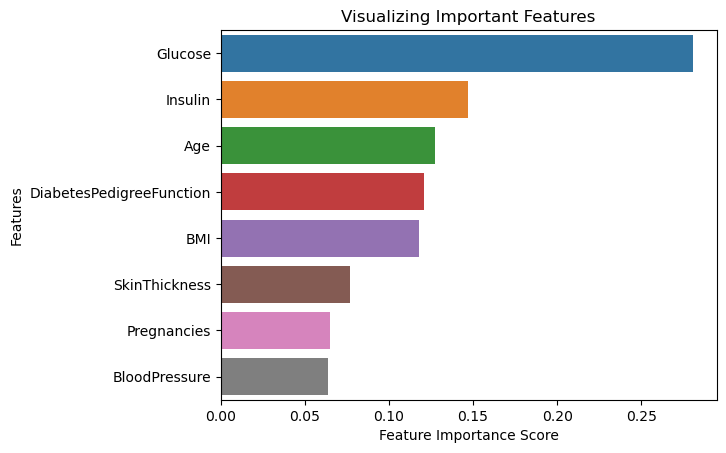

In [45]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
plt.title("Visualizing Important Features")


##                                  Thank you .